# Relatório de Análise VII

### Criando Agrupamento

In [112]:
import pandas as pd

In [113]:
dados = pd.read_csv('aluguel_residencial.csv', sep = ';')

In [114]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m²,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


#### https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats

In [115]:
# Tirando a media da coluna valor:
dados['Valor'].mean()

5046.172821405663

#### Pegando o valor medio do aluguel de cada bairro:

In [116]:
# Criando uma lista com alguns bairros para pesquisar a media:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']

In [117]:
# Fazendo a seleção dos bairros da lista da coluna Bairro:
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]
dados[['Bairro']].head(15)

,Bairro
0,Copacabana
5,Barra da Tijuca
9,Copacabana
10,Copacabana
11,Copacabana
14,Barra da Tijuca
15,Tijuca
16,Barra da Tijuca
18,Tijuca
19,Ipanema


In [118]:
# Para não aparecer os bairros repetidos fazemos o drop():
dados['Bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
78           Flamengo
Name: Bairro, dtype: object

### Criando um grupo para agrupar esses bairros:

In [119]:
grupo_bairro = dados.groupby('Bairro')

In [120]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [121]:
# Saber o que ele criou, ele retorna vários diciconários informando qual indice foi encontrado o barrio: ex:
grupo_bairro.groups

{'Barra da Tijuca': [5, 14, 16, 21, 30, 32, 35, 42, 43, 60, 61, 64, 68, 74, 79, 93, 107, 110, 112, 117, 130, 132, 136, 150, 153, 155, 165, 166, 173, 186, 189, 207, 214, 221, 224, 233, 236, 239, 244, 259, 265, 274, 276, 291, 292, 293, 295, 302, 308, 311, 325, 335, 336, 345, 360, 366, 368, 374, 380, 387, 389, 400, 412, 432, 433, 435, 436, 439, 449, 451, 462, 463, 465, 473, 476, 484, 494, 500, 503, 511, 537, 538, 539, 540, 543, 547, 552, 554, 555, 556, 584, 587, 588, 590, 594, 596, 601, 611, 622, 630, ...], 'Botafogo': [23, 48, 87, 88, 111, 119, 127, 134, 196, 200, 225, 334, 362, 415, 416, 498, 524, 526, 545, 593, 649, 685, 719, 756, 765, 822, 827, 861, 915, 924, 928, 1006, 1043, 1080, 1091, 1110, 1116, 1127, 1140, 1165, 1201, 1205, 1223, 1250, 1282, 1295, 1304, 1317, 1348, 1383, 1414, 1419, 1455, 1517, 1529, 1579, 1630, 1655, 1670, 1699, 1741, 1742, 1788, 1814, 1823, 1826, 1853, 1922, 1931, 1957, 1972, 1981, 1989, 2029, 2066, 2069, 2081, 2083, 2084, 2088, 2097, 2148, 2149, 2165, 2179, 21

In [122]:
# Pegando a media por bairro com um for:
for bairro, data in grupo_bairro:
    print(f'{bairro} -> {data.Valor.mean()}')

Barra da Tijuca -> 7069.552938130986
Botafogo -> 8791.828178694159
Copacabana -> 4126.677004538578
Flamengo -> 4113.526610644258
Ipanema -> 9352.001133786847
Leblon -> 8746.344992050874
Tijuca -> 2043.52


In [123]:
# Pegando a media por bairro da lista sem for:
grupo_bairro[['Valor']].mean()

,Valor
Bairro,
Barra da Tijuca,7069.552938
Botafogo,8791.828179
Copacabana,4126.677005
Flamengo,4113.526611
Ipanema,9352.001134
Leblon,8746.344992
Tijuca,2043.520000


In [124]:
# Passando mais de um váriavel e arredondando os numeros:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


### Exércicio:
- Considere o seguinte DataFrame para responder o exercício abaixo:

In [125]:
alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
                        'Aprovado': [True, False, False, True, True, True, False, False]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas', 'Aprovado'])

In [126]:
alunos

,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
1,Cátia,27,F,2.5,False
2,Denis,56,M,5.0,False
3,Beto,32,M,10.0,True
4,Bruna,42,F,8.2,True
5,Dara,21,F,7.0,True
6,Carlos,19,M,6.0,False
7,Alice,35,F,5.6,False


### Como devemos proceder para obter um DataFrame com as notas médias dos alunos, com duas casas decimais, segundo seu sexo?

In [127]:
# Fazendo o agrupamento da coluna Sexo:
sexo = alunos.groupby('Sexo')
sexo

In [128]:
# Colocando a variavel sexo em um DataFrame e Pegando o agrupamento e fazendo a media das notas por sexo 
sexo = pd.DataFrame(sexo['Notas'].mean().round(2))
sexo

,Notas
Sexo,
F,5.82
M,7.12


In [129]:
# Criando a coluna Notas Médias e atribuindo a média da variavel sexo a essa coluna:
sexo.columns = ['Notas Médias']
sexo

,Notas Médias
Sexo,
F,5.82
M,7.12


## Estatísticas Descritivas:

### Usando o método describe()
 - Ele gera um conjunto de estatisticas descritivas: 
 - count(é a frequencia que aparece, ou seja a quantidade)
 - mean(média)
 - std(desvio padrão) Desvio padrão é quando está totalmente fora do padrão as informações, ou seja, algo de errado com aquela inforamção de determinada linha ou coluna. É a informação totalmente desviada do padrão. No nosso exemplo é botafogo que está totalmente fora do padrão, o valor ta muito alto, talvez erraram na base de dados e ao invés de colocar o valor de locação colocaram o valor de venda.
 - min(valor minimo)
 - 25%(primeiro quartil, ou seja ele divide a informação em 25% estão abaixo desse valor e 75% acima)
 - 50%(é a mediana, faz a mesma coisa do 25% so que 50/50)
 - 75%( terceiro quartil, separa 75% pra baixo e 25% pra cima)
 - max(valor máximo)

In [130]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


### Selecionando quais estaticas quero com o método aggregate():
- Posso passar uma lista com as estatisticas que quero

In [131]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


### Alterando o nome das colunas min, max

In [132]:
grupo_bairro['Valor'].aggregate(['min', 'max']).rename(columns = {'min':'Mínimo', 'max':'Máximo'})

,Mínimo,Máximo
Bairro,,
Barra da Tijuca,800.0,600000.0
Botafogo,700.0,4500000.0
Copacabana,100.0,35000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,90000.0
Leblon,100.0,100000.0
Tijuca,750.0,45000.0


# Matplotlib

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
# Configurando o tamanho do gráfico
plt.rc('figure', figsize = (20,10))

<AxesSubplot:xlabel='Bairro'>

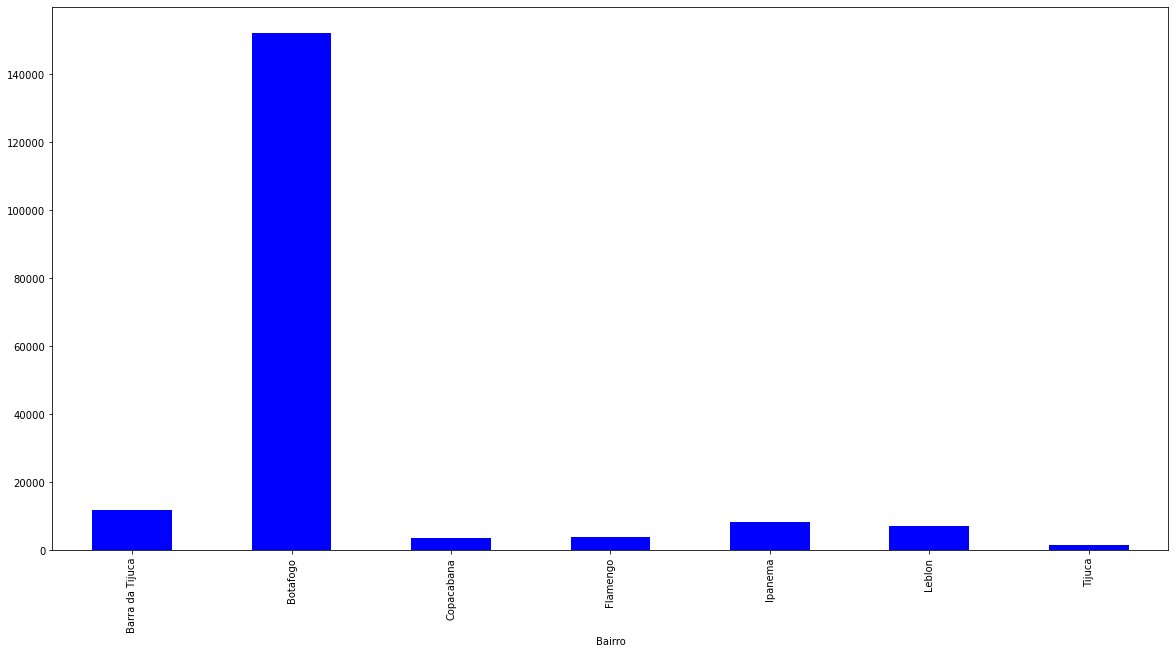

In [134]:
# Dos bairros que selecionei na lista e atribui a variavel grupo_bairro, na coluna ['Valor'], quero o std(desvio padrão), 
# plotando um gráfico de barra, na cor azul.
grupo_bairro['Valor'].std().plot.bar(color = 'blue')

### Configurando melhor o gráfico:
- Colocando o nome do eixo y
- Colocando um titulo e configurando o tamanho da fonte do titulo e a cor
- Ao inés de pegar pelo std(desvio padrão) vamos pegar pela media
- Atribuir esse grafico a um variavel

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

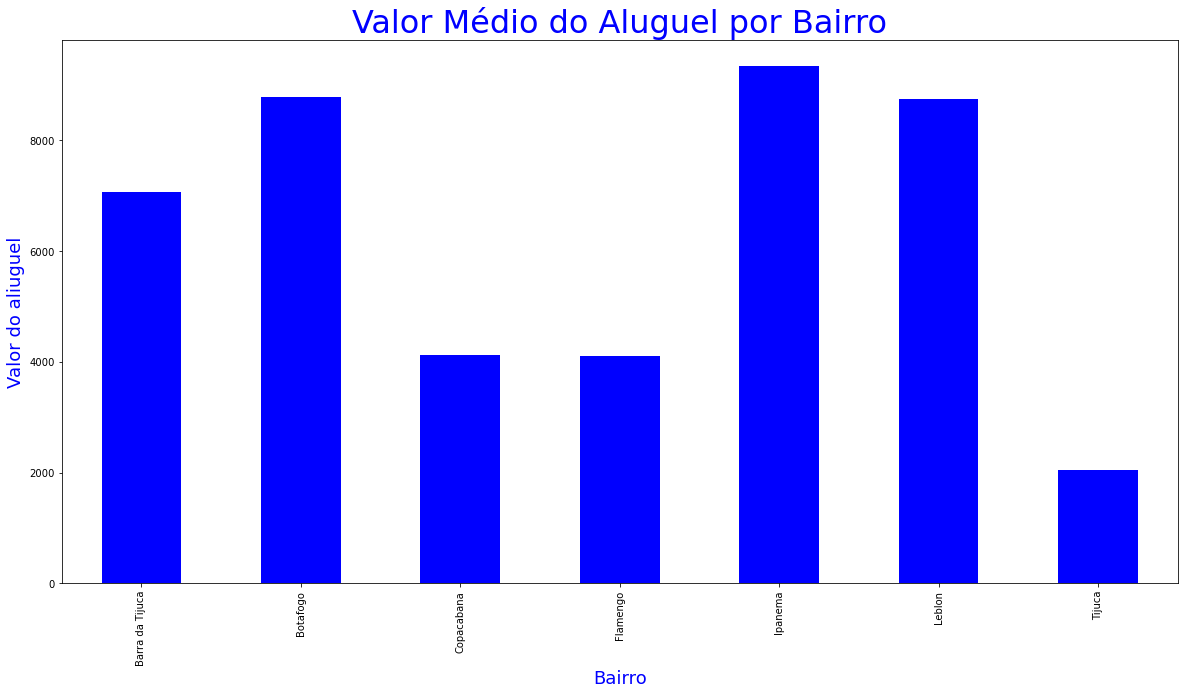

In [141]:
grafico = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
grafico.set_ylabel('Valor do aliuguel', {'fontsize': 18, 'color':'blue'})
grafico.set_xlabel('Bairro', {'fontsize': 18, 'color':'blue'})
grafico.set_title('Valor Médio do Aluguel por Bairro', {'fontsize':32, 'color':'blue'})

## Exercicio:
- A criação de grupamentos com o método groupby() facilita bastante na sumarização das informações de um DataFrame. O método describe() aplicado a um grupamento gera um conjunto de estatísticas descritivas bastante útil no processo de análise de dados, conforme o exemplo abaixo:

In [142]:
precos = pd.DataFrame([['Feira', 'Cebola', 2.5], 
                        ['Mercado', 'Cebola', 1.99], 
                        ['Supermercado', 'Cebola', 1.69], 
                        ['Feira', 'Tomate', 4], 
                        ['Mercado', 'Tomate', 3.29], 
                        ['Supermercado', 'Tomate', 2.99], 
                        ['Feira', 'Batata', 4.2], 
                        ['Mercado', 'Batata', 3.99], 
                        ['Supermercado', 'Batata', 3.69]], 
                        columns = ['Local', 'Produto', 'Preço'])
precos

,Local,Produto,Preço
0,Feira,Cebola,2.50
1,Mercado,Cebola,1.99
2,Supermercado,Cebola,1.69
3,Feira,Tomate,4.00
4,Mercado,Tomate,3.29
5,Supermercado,Tomate,2.99
6,Feira,Batata,4.20
7,Mercado,Batata,3.99
8,Supermercado,Batata,3.69


### Gerando análise descritiva dos Produtos:

In [145]:
produtos = precos.groupby('Produto')
produtos.describe().round(2)

Preço                                         
        count  mean   std   min   25%   50%   75%  max
Produto                                               
Batata    3.0  3.96  0.26  3.69  3.84  3.99  4.10  4.2
Cebola    3.0  2.06  0.41  1.69  1.84  1.99  2.24  2.5
Tomate    3.0  3.43  0.52  2.99  3.14  3.29  3.64  4.0

### Gerando análise descritiva (Produto,	Média,	Desvio Padrão,	Mínimo	Máximo)
- Mudar o nome das colunas e somente a análise descritiva de alguns 

In [148]:
# Criando as estatiticas que eu quero:
estatisticas = ['mean', 'std', 'min', 'max']

In [150]:
# Mudando o nome das colunas da estatitsticas:
nomes = {'mean': 'Média', 'std': 'Desvio Padrão', 
    'min': 'Mínimo', 'max': 'Máximo'}

In [151]:
# Agregando a coluna Preço do DataFrame, os estatisticas, o nome das colunas e arredondando para duas casas decimais
produtos['Preço'].aggregate(estatisticas).rename(columns = nomes).round(2)

,Média,Desvio Padrão,Mínimo,Máximo
Produto,,,,
Batata,3.96,0.26,3.69,4.2
Cebola,2.06,0.41,1.69,2.5
Tomate,3.43,0.52,2.99,4.0
